In [1]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import anova
import bff
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

Autosaving every 30 seconds


In [2]:
df = pd.read_excel("data63.xlsx")
df

,ResponseId,Country,cond,one,condName,Intervention_order,Belief1,Belief2,Belief3,Belief4,...,Edu,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total,WEPTcc,BELIEFcc,POLICYcc
0,R_1r7Yr7R1xMimIvj,Usa,5,1,CollectAction,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,98.0,77.0,86.0,93.0,...,3.0,5.0,"2,4,5",7.0,80.0,6.056,95.501,1,88.50,89.000000
1,R_2ATgV5VxewrTRiI,Usa,1,1,Control,PolicySupport|BeliefinAnthrCC|Socialmediashari...,49.0,50.0,51.0,51.0,...,3.0,4.0,"1,2,3,4,5,6,7",5.0,51.0,16.284,200.742,0,50.25,66.222222
2,R_3ENlePBlLyYjExr,Usa,9,1,LetterFutureGen,SocialmediasharingPipedText|PolicySupport|Beli...,87.0,82.0,84.0,83.0,...,3.0,5.0,"1,2,3,6,7",8.0,73.0,5.701,218.442,1,84.00,84.222222
3,R_2c0HQgvYzas6mus,Usa,4,1,SciConsens,PolicySupport|SocialmediasharingPipedText|Beli...,1.0,1.0,0.0,0.0,...,3.0,5.0,"1,2,3,4,5,6,7",4.0,1.0,13.282,12.702,0,0.50,1.222222
4,R_00siryCwgdMus6J,Usa,8,1,PluralIgnorance,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,56.0,59.0,61.0,54.0,...,3.0,5.0,"1,3,5,6,7",7.0,65.0,8.474,19.315,0,57.50,80.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59435,R_2TuXye2HP6EO5KZ,Vietnam,11,1,FutureSelfCont,PolicySupport|SocialmediasharingPipedText|Beli...,49.0,100.0,100.0,74.0,...,3.0,2.0,"1,2,3,4,5,6,7",7.0,60.0,27.732,873.538,0,80.75,82.500000
59436,R_3R3p8C0gzLKTcCu,Vietnam,12,1,BindingMoral,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,94.0,98.0,98.0,96.0,...,3.0,2.0,"1,2,4,6,7",3.0,74.0,49.502,0.000,0,96.50,86.444444
59437,R_OeT1JV3yC1aJ4EF,Vietnam,8,1,PluralIgnorance,SocialmediasharingPipedText|PolicySupport|Beli...,100.0,100.0,100.0,100.0,...,3.0,1.0,"2,4,5,6,7",6.0,100.0,7.920,89.072,7,100.00,83.333333
59438,R_2azVf0KXD3rtly8,Vietnam,3,1,NegativeEmotions,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,79.0,51.0,78.0,51.0,...,3.0,NaN,"1,2,3,4,5,6,7",7.0,100.0,40.222,398.193,8,64.75,66.666667


In [5]:
df.Country.unique()

array(['Usa', 'Algeria', 'Armenia', 'Australia', 'Austria', 'Belgium',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Czechia',
       'Denmark', 'Ecuador', 'Finland', 'France', 'Gambia', 'Germany',
       'Ghana', 'Greece', 'India', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kenya', 'Latvia', 'Mexico', 'Morocco', 'Netherlands',
       'Newzealand', 'Nigeria', 'Northmacedonia', 'Norway', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saudiarabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia',
       'Southafrica', 'Southkorea', 'Spain', 'Srilanka', 'Sudan',
       'Sweden', 'Switzerland', 'Taiwan', 'Tanzania', 'Thailand',
       'Turkey', 'Uganda', 'Uk', 'Ukraine', 'Unitedarabemirates',
       'Uruguay', 'Venezuela', 'Vietnam'], dtype=object)

In [26]:
set(df.Country.unique()).difference(set(world.name.unique()))

{'Singapore'}

In [22]:
df.replace({'Russian Federation':'Russia',
                'Unitedarabemirates':'United Arab Emirates',
                'Uk':'United Kingdom',
                'Southkorea':'South Korea',
                'Northmacedonia':'North Macedonia',
                'Southafrica':'South Africa',
                'Saudiarabia': 'Saudi Arabia',
                'Srilanka': 'Sri Lanka',
                'Newzealand': 'New Zealand',
                'Newzealand': 'New Zealand',
                'Usa': 'United States of America'}, inplace=True)
df.Country.unique()

array(['United States of America', 'Algeria', 'Armenia', 'Australia',
       'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Czechia', 'Denmark', 'Ecuador', 'Finland', 'France',
       'Gambia', 'Germany', 'Ghana', 'Greece', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kenya', 'Latvia', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'Nigeria', 'North Macedonia',
       'Norway', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka',
       'Sudan', 'Sweden', 'Switzerland', 'Taiwan', 'Tanzania', 'Thailand',
       'Turkey', 'Uganda', 'United Kingdom', 'Ukraine',
       'United Arab Emirates', 'Uruguay', 'Venezuela', 'Vietnam'],
      dtype=object)

In [21]:
world.name.unique()

array(['Tanzania', 'W. Sahara', 'Canada', 'United States of America',
       'Kazakhstan', 'Uzbekistan', 'Papua New Guinea', 'Indonesia',
       'Argentina', 'Chile', 'Dem. Rep. Congo', 'Somalia', 'Kenya',
       'Sudan', 'Chad', 'Haiti', 'Dominican Rep.', 'Russia', 'Bahamas',
       'Falkland Is.', 'Norway', 'Greenland', 'Fr. S. Antarctic Lands',
       'Timor-Leste', 'South Africa', 'Lesotho', 'Mexico', 'Uruguay',
       'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica',
       'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize',
       'Venezuela', 'Guyana', 'Suriname', 'France', 'Ecuador',
       'Puerto Rico', 'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana',
       'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger',
       'Nigeria', 'Cameroon', 'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea',
       'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso',
       'Central African Rep.', 'Congo', 'Gabon', 'Eq. Guinea', 'Zambia',
       'Malawi', 'Mozambiqu

# Figure S1

/var/folders/53/6ypqgtmd38ggqwb6vvtqdz6h0000gp/T/ipykernel_70380/256608036.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


<IPython.core.display.Javascript object>


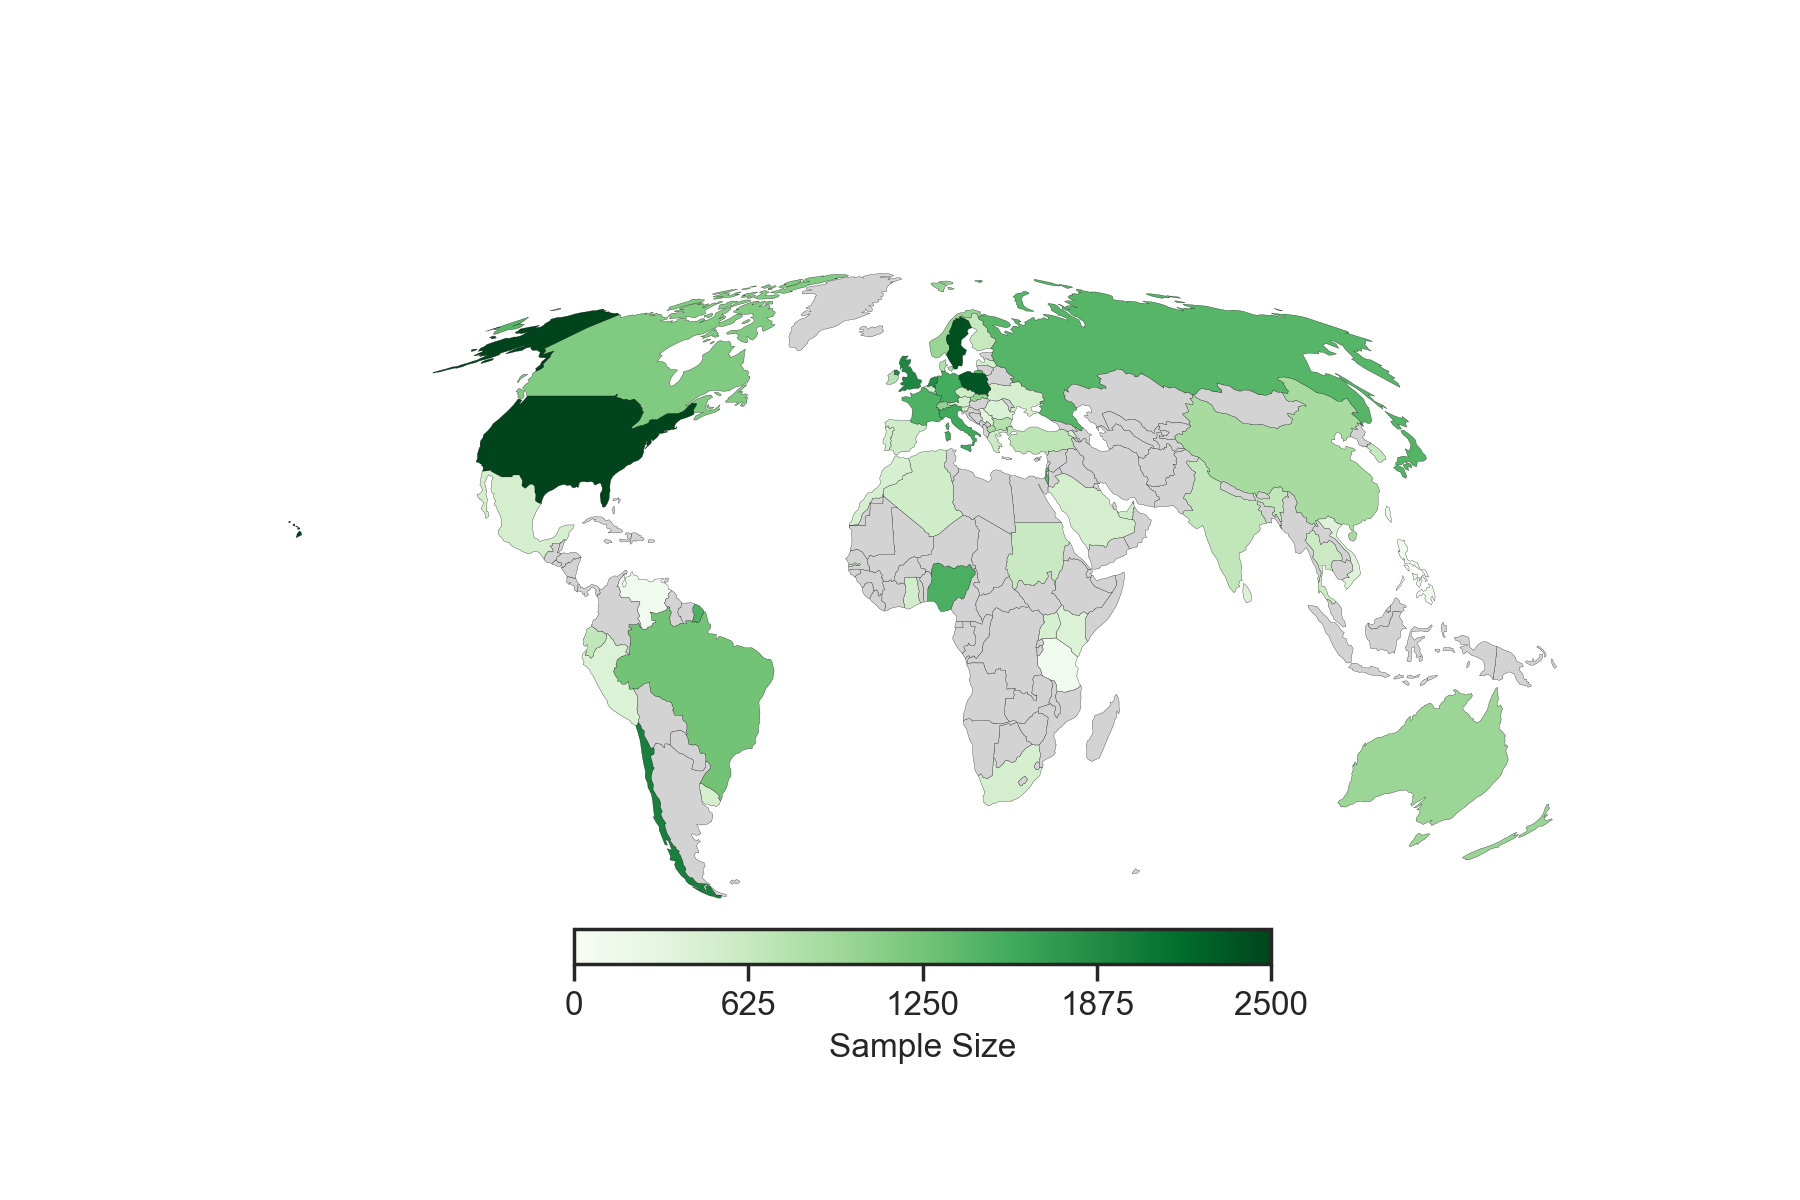

In [23]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]
world = world.to_crs(ccrs.Mollweide().proj4_init)
world = world.cx[world.bounds.minx.min()*.8:world.bounds.maxx.max()*.8, world.bounds.miny.min():world.bounds.maxy.max()]

strip_excess = np.vectorize(lambda x: x[2:-1])

sample = df.groupby("Country").agg("count")[["ResponseId"]].reset_index().rename(columns={"Country": "name", "ResponseId": "N"})
data_world = pd.merge(world, sample, left_on='name', right_on='name', how='left')
data_world = data_world.to_crs(ccrs.Mollweide())

fig, ax = plt.subplots(1, 1, figsize=(9,6))

temp = data_world.plot(
    ax=ax,
    column="N",
    legend=True,
    legend_kwds={'label': "Sample Size",
                 'shrink': 0.5,  
                 'aspect': 20,
                 'location': 'bottom',
                 'ticks': np.linspace(0, 2500, 5),
                 'pad': 0.
    },
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
    vmin=0,
    vmax=2500,
    cmap='Greens',
    edgecolor='black',
    linewidth=0.1
)
temp.set_axis_off()
plt.savefig('map_sample_63.png', dpi = 500)